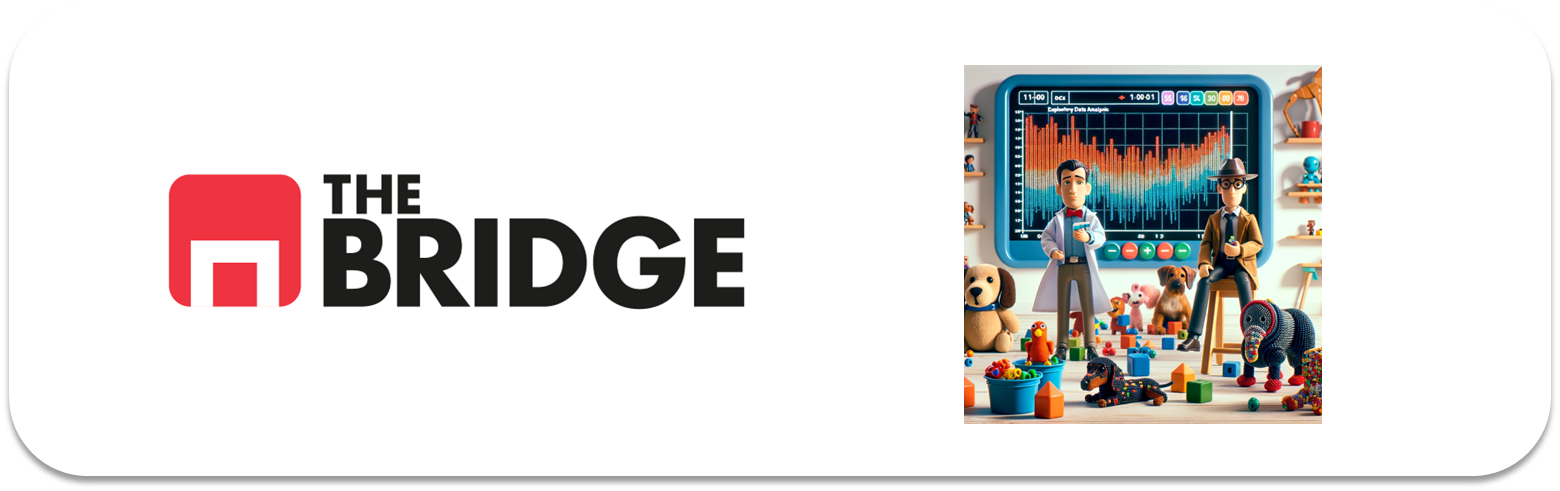

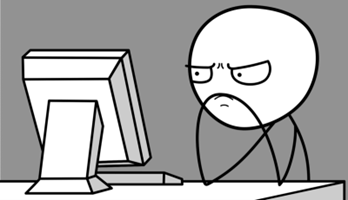

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import sys
import os

import pandas as pd

import bootcampviztools as viz
import datascience as ds

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
admisiones = pd.read_csv('./data/admission_data.csv',
                         index_col=0)
admisiones

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,Department of Mechanical Engineering,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [3]:
# Esta columna no da ninguna información porque son todos sus valores iguales

admisiones.drop(columns=['Year'], inplace=True)

### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

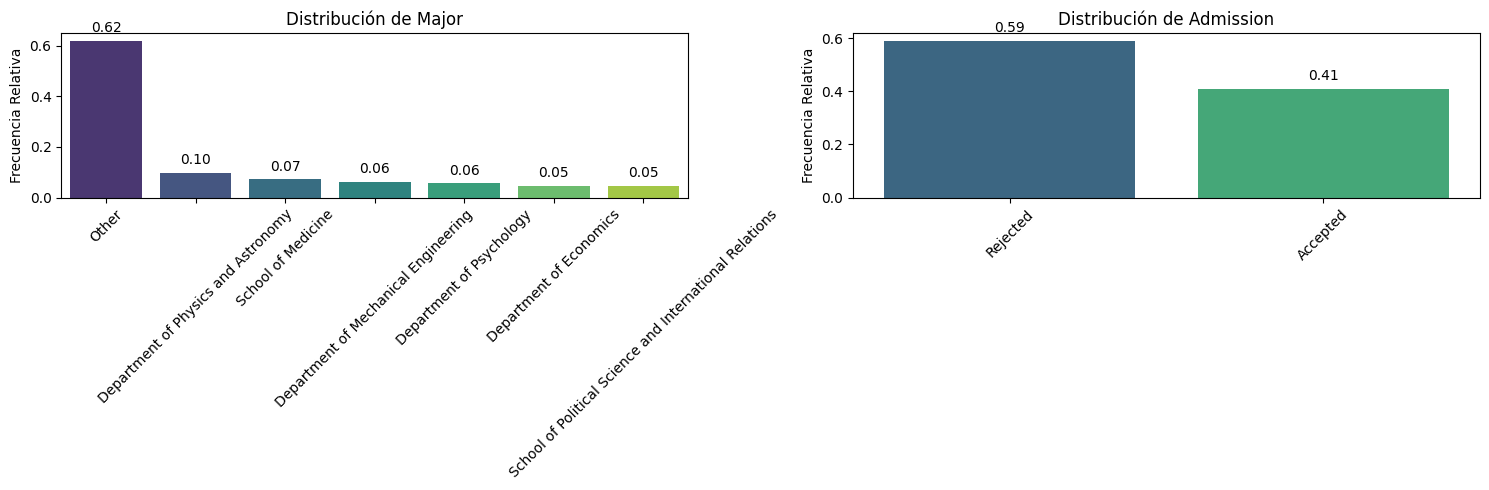

In [4]:
# En este dataset todas las columnas son categóricas
viz.pinta_distribucion_categoricas(admisiones, ['Major', 'Admission'], relativa=True)

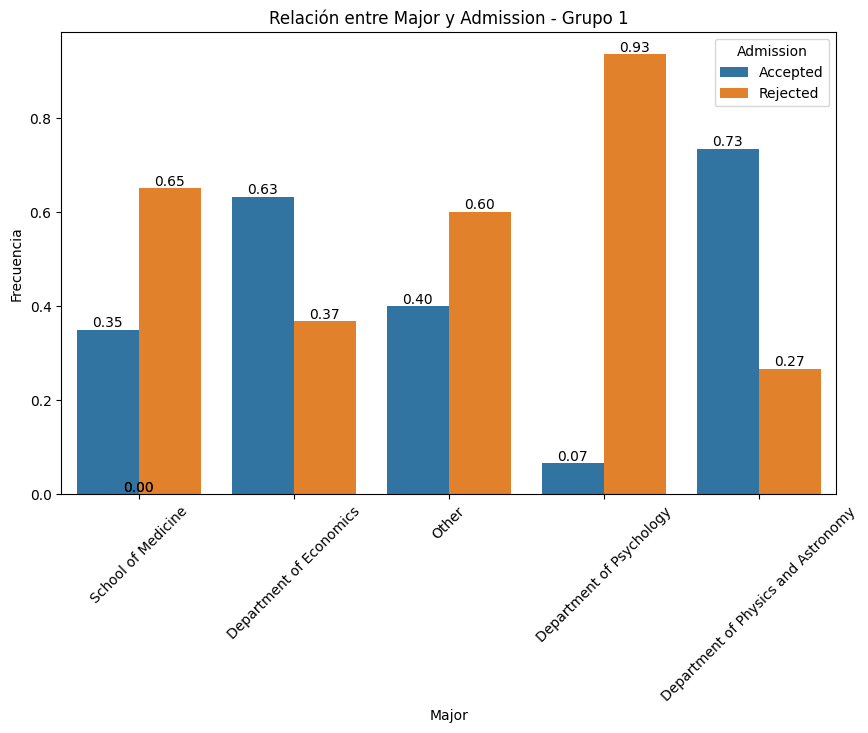

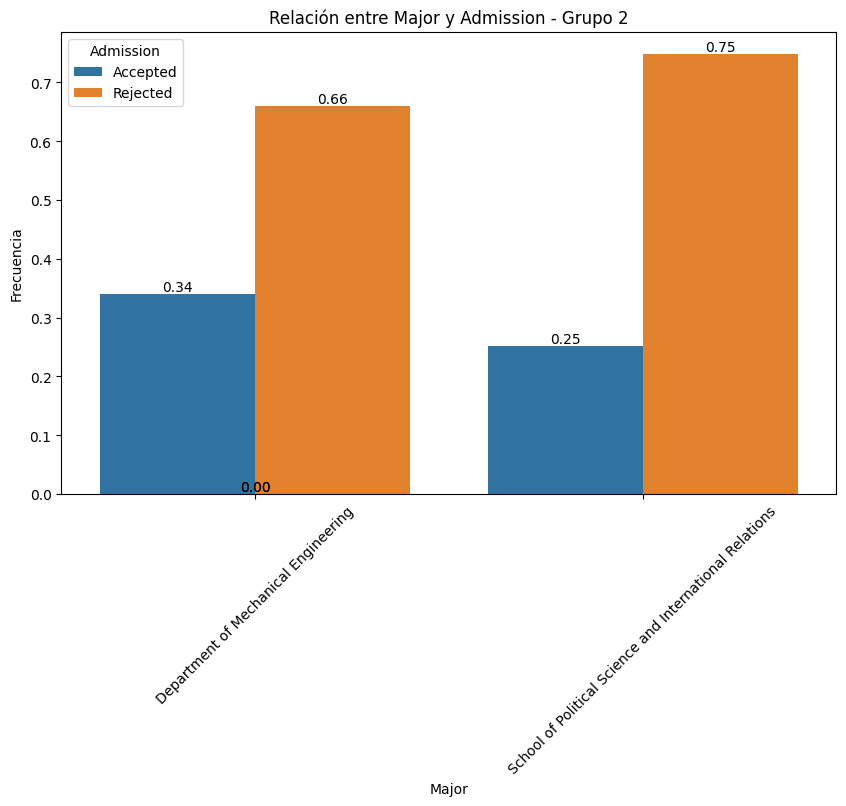

In [5]:
viz.plot_categorical_relationship_fin(admisiones, "Major", "Admission", relative_freq=True)

Hay muchos datos de los que no sabemos el departamento, pero de los que sí sabemos:
- El departamento de psicología tiene el mayor porcentaje de rechazados.
- El departamento de física y astronomía tiene el mayor porcentaje de aceptados.


In [6]:
# En números, por si no te crees el gráfico
admisiones.groupby("Major", as_index = False)["Admission"].value_counts(normalize = True)

,Major,Admission,proportion
0,Department of Economics,Accepted,0.632479
1,Department of Economics,Rejected,0.367521
2,Department of Mechanical Engineering,Rejected,0.660354
3,Department of Mechanical Engineering,Accepted,0.339646
4,Department of Physics and Astronomy,Accepted,0.733547
5,Department of Physics and Astronomy,Rejected,0.266453
6,Department of Psychology,Rejected,0.934174
7,Department of Psychology,Accepted,0.065826
8,Other,Rejected,0.600707
9,Other,Accepted,0.399293


### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

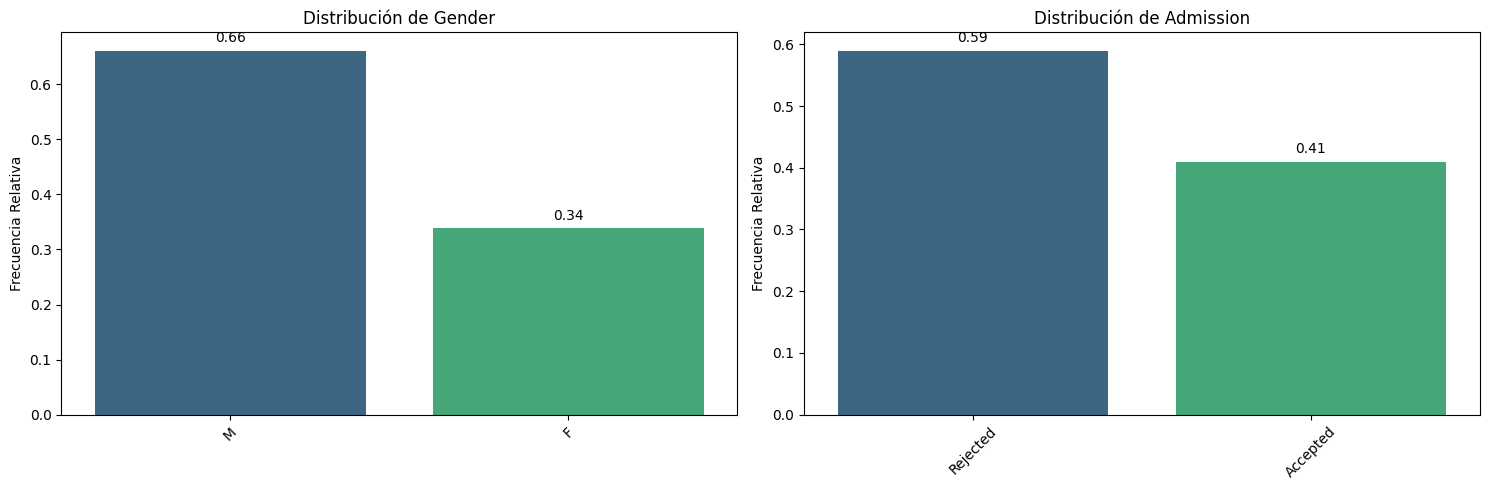

In [7]:
viz.pinta_distribucion_categoricas(admisiones, ['Gender', 'Admission'], relativa=True)

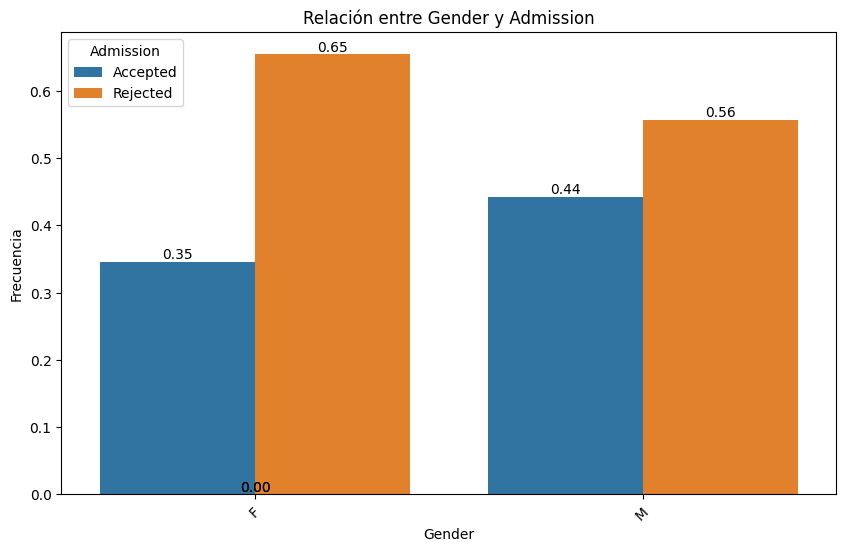

In [8]:
viz.plot_categorical_relationship_fin(admisiones, "Gender", "Admission", relative_freq=True)

In [9]:
admisiones.Gender.value_counts()

Gender
M    8442
F    4321
Name: count, dtype: int64

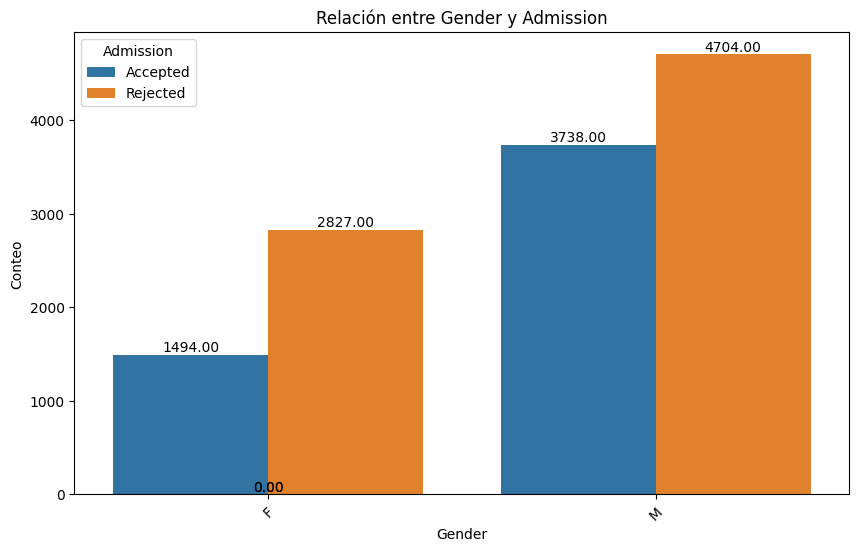

In [10]:
viz.plot_categorical_relationship_fin(admisiones, "Gender", "Admission", relative_freq=False)

Porcentualmente los resultados no son muy significativos. Pero si hay que mencionar que se presentaron muchos más hombres, por eso también son más numéricamente los aceptados.

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [11]:
tips = pd.read_csv('./data/tips.csv',
                         index_col=0)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

In [13]:
ds.get_cardinality_class(tips, 10, 20)

,Card,%_Card,Tipo,Clase
total_bill,229,93.852459,float64,Numérica Continua
tip,123,50.409836,float64,Numérica Continua
sex,2,0.819672,object,Binaria
smoker,2,0.819672,object,Binaria
day,4,1.639344,object,Categórica
time,2,0.819672,object,Binaria
size,6,2.459016,int64,Categórica


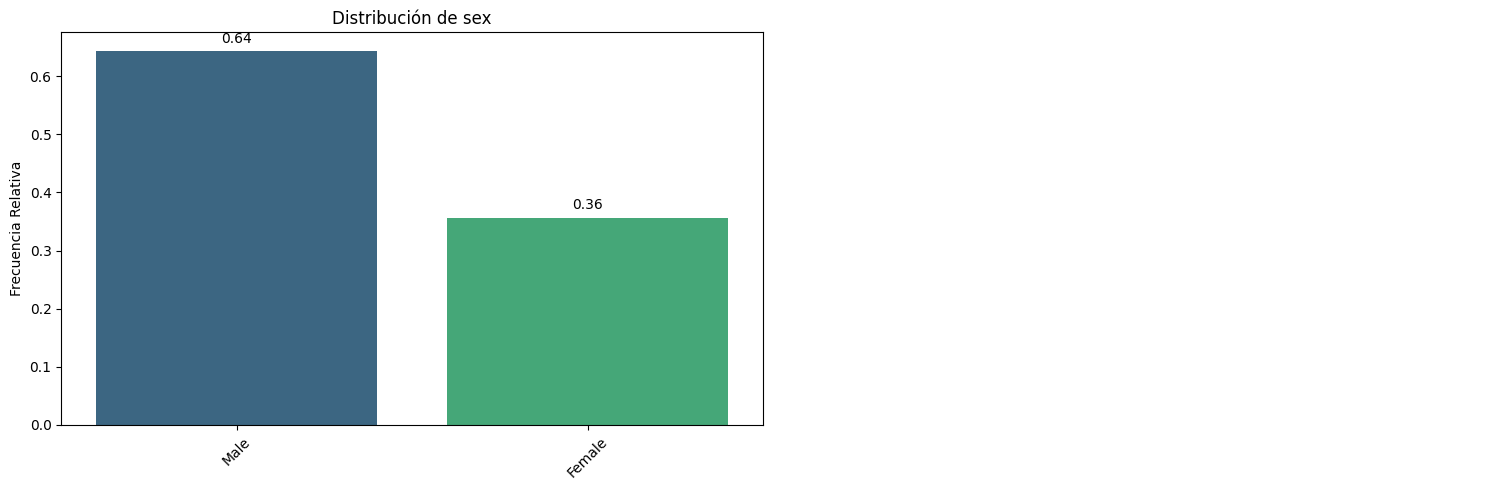

(2,)


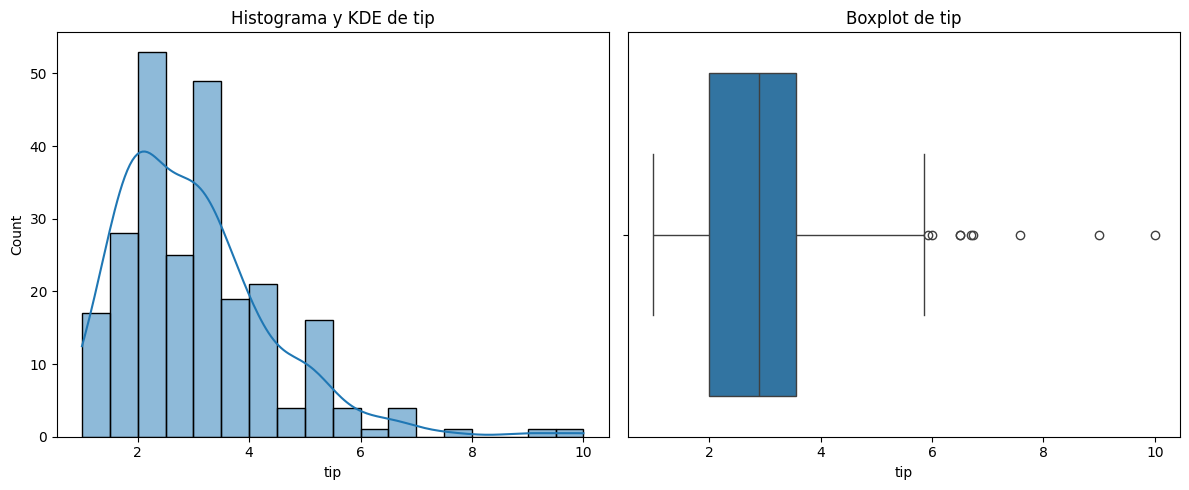

In [14]:
# "tip" es una variable numérica contínua, y "sex" una categórica (binaria)
# Voy a hacer un análisis bivariante combinado de ambas columnas.
 
# Primero veamos la frecuencia relativa de "sex"
viz.pinta_distribucion_categoricas(tips, ["sex"], relativa= True)

# Y después el histograma, KDE y plot-box de "tip"
viz.plot_combined_graphs(tips, ["tip"])

Después de ver la distribución de ambas variables independientemente sabemos que hay algunos outliers en las propinas, pero son valores posibles. También se ve que los asistentes son mayormente varones.

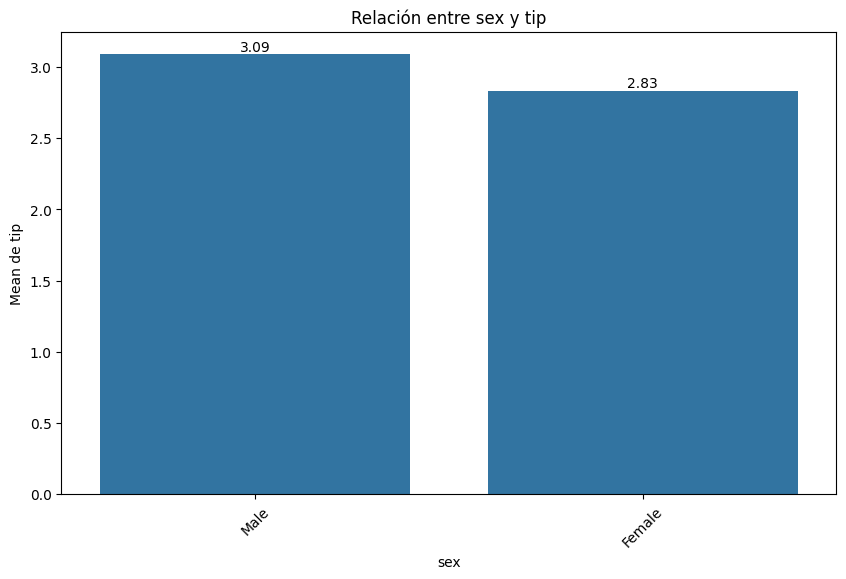

In [15]:
# Añade el cálculo de la media y mediana de la variable continua por 
# cada valor de la variable categórica
viz.plot_categorical_numerical_relationship(tips, "sex", "tip", measure = "mean")

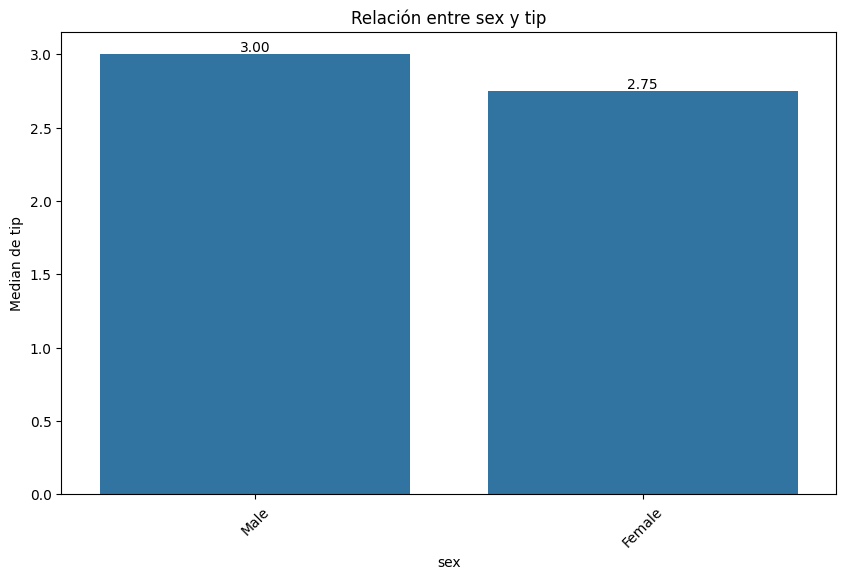

In [16]:
viz.plot_categorical_numerical_relationship(tips, "sex", "tip", measure = "median")

- Aunque asisten más hombres, la media o mediana de las propinas que dejan hombres y mujeres es similar.
- Las propinas tienen una media y mediana similar a la del total

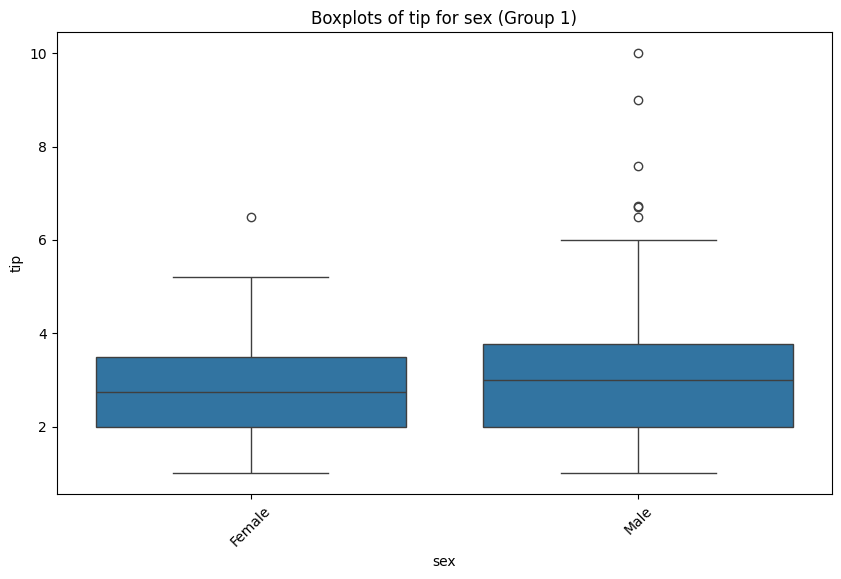

In [17]:
viz.plot_grouped_boxplots(tips, "sex", "tip")

### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

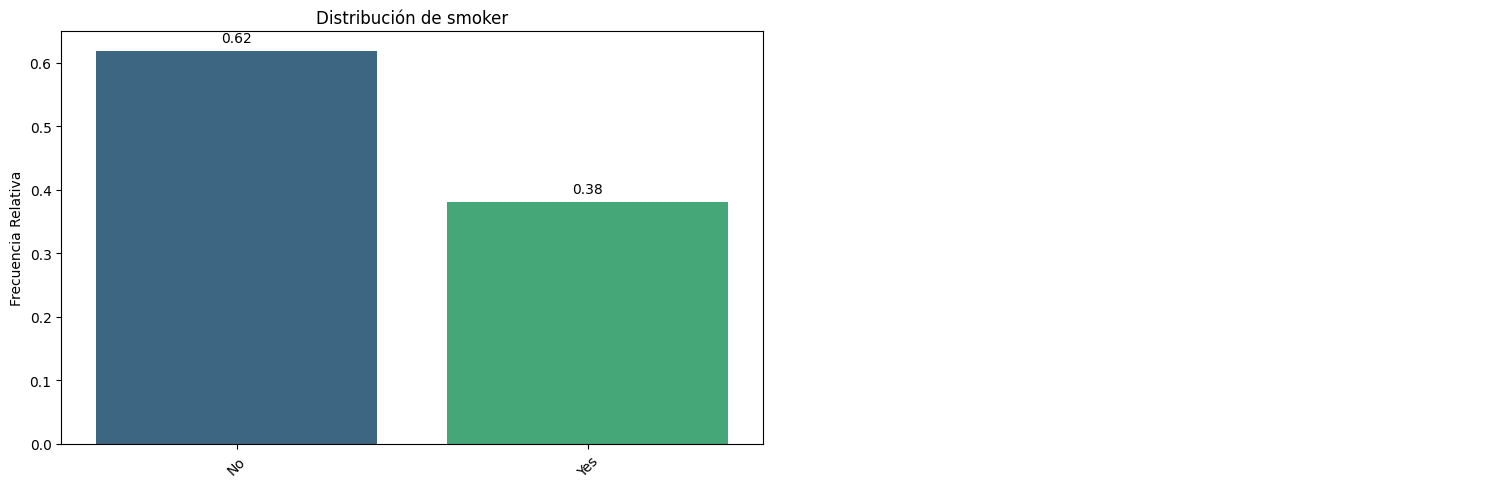

In [18]:
# Primero veamos la frecuencia relativa de "sex"
viz.pinta_distribucion_categoricas(tips, ["smoker"], relativa= True)

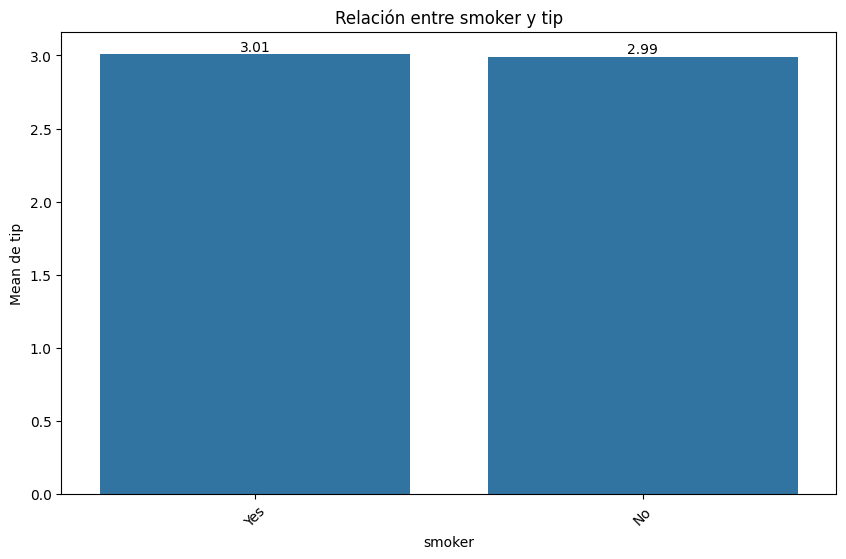

In [19]:
viz.plot_categorical_numerical_relationship(tips, "smoker", "tip", measure = "mean")

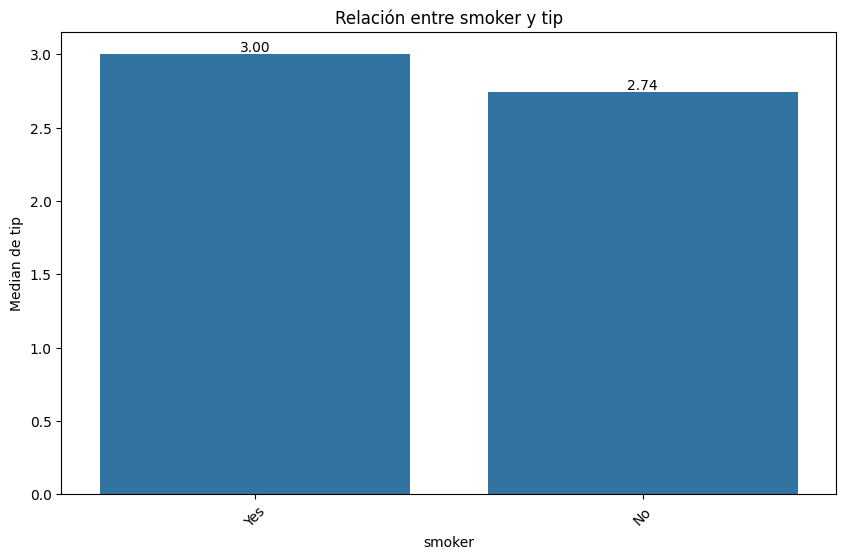

In [20]:
viz.plot_categorical_numerical_relationship(tips, "smoker", "tip", measure = "median")

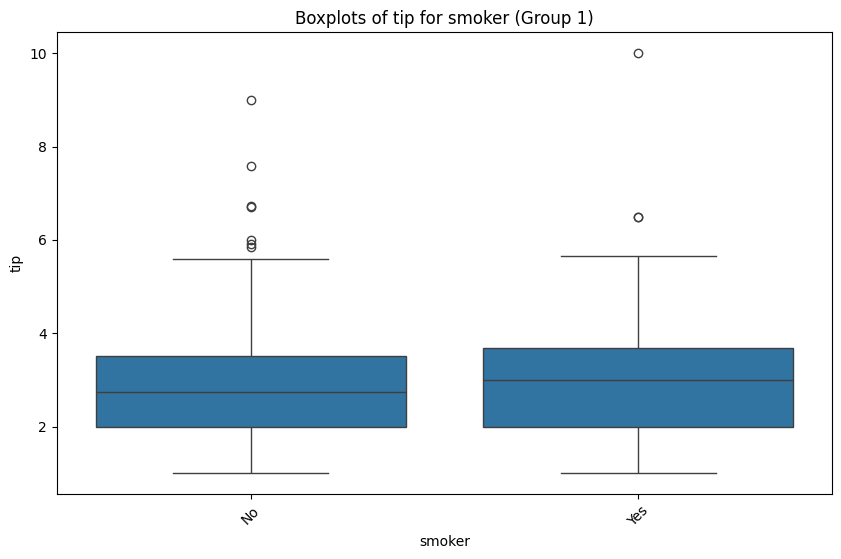

In [21]:
viz.plot_grouped_boxplots(tips, "smoker", "tip")

- No hay ninguna diferencia significativa entre fumadores y no fumadores. Además la media y mediana es de similar valor al que tendrían sin discriminar por fumadores

### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [23]:
car_crashes = pd.read_csv('./data/car_crashes.csv',
                          sep = '|',
                          index_col=0)
car_crashes

# La limpieza no la voy a hacer pero sería la misma que la del último workout de la U01

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


### Ejercicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

In [24]:
ds.get_cardinality_class(car_crashes, 10, 20) # Todas las variables son numéricas continuas

,Card,%_Card,Tipo,Clase
total,45,88.235294,float64,Numérica Continua
speeding,50,98.039216,float64,Numérica Continua
alcohol,50,98.039216,float64,Numérica Continua
not_distracted,50,98.039216,float64,Numérica Continua
no_previous,50,98.039216,float64,Numérica Continua
ins_premium,51,100.0,float64,Numérica Continua
ins_losses,51,100.0,float64,Numérica Continua
abbrev,51,100.0,object,Numérica Continua


### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?